<a href="https://colab.research.google.com/github/AllanHigorLP/Atividade_avaliativa-2.2-RNA/blob/main/PP2_2_2_Proposi%C3%A7%C3%A3o_e_Avalia%C3%A7%C3%A3o_de_RNAs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Redes Neurais Artificiais 2021.1

- **Disciplina**: Redes Neurais Artificiais 2021.1  
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  
        

Levando em conta a base de dados **_Forest Cover Type_**, esta segunda parte do Projeto Prático 2.2 diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Testando Redes Neurais sem os Atributos Categórios

1. Abra a base de dados em questão
2. Elimine todas as colunas relativas aos atributos categóricos
3. Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X
4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória
5. Efetue o escalonamento dos atributos

### Escalonando os atributos

O treinamento de uma rede neural artificial é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito escalonando-se todos os atributos para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


No nosso caso, vamos usar a padronização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se subtrair a média e dividir pelo desvio padrão:

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

Em seguida, o mesmo deve ser feito com os atributos preditores do conjunto de testes, mas com padronização relativa ao conjunto de treinamento:

X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

Se todo o conjunto X for utilizado na padronização, a rede neural receberá informações do conjunto de teste por meio da média e variância utilizada para preparar os dados de treinamento, o que não é desejável.


### Continuando

5. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
    5.1 Utilize a função de ativação ReLU  
    5.2 Utilize o solver Adam    
    5.3 Imprima o passo a passo do treinamento    
    5.4 Utilize o número máximo de épocas igual a 300  
6. Com o modelo em questão, após o treinamento, apresente:  
    6.1 Matriz de confusão para o conjunto de teste  
    6.2 Acurácia  
    6.3 F-Score  
    6.4 Precisão  
    6.5 Revocação  
7. Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 100 vezes  
    7.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout  
    7.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
8. Repita por 100 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD  
    8.1 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
9. Houve influência da escolha do otimizador no desempenho da rede?

# 1 - Abra a base de dados em questão

**Criando o diretório no Google Drive**

In [ ]:
from google.colab import drive, files
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Importando as bibliotecas**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neural_network import MLPClassifier #Importing MLPClassifier for classification.
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score

**Abrindo o dataset**

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/covtype.csv')
print(df)

        Elevation  Aspect  Slope  ...  Soil_Type39  Soil_Type40  Cover_Type
0            2596      51      3  ...            0            0           5
1            2590      56      2  ...            0            0           5
2            2804     139      9  ...            0            0           2
3            2785     155     18  ...            0            0           2
4            2595      45      2  ...            0            0           5
...           ...     ...    ...  ...          ...          ...         ...
581007       2396     153     20  ...            0            0           3
581008       2391     152     19  ...            0            0           3
581009       2386     159     17  ...            0            0           3
581010       2384     170     15  ...            0            0           3
581011       2383     165     13  ...            0            0           3

[581012 rows x 55 columns]


# 2 - Elimine todas as colunas relativas aos atributos categóricos

**Mostrando as colunas do dataset**

In [ ]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

**Deletando os atributos categóricos**

In [ ]:
df.drop(columns=['Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40'], inplace=True)

**Verificando se há inconsistencias após a eliminação das colunas**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 11 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Cover_Type                          581012 non-null  int64
dtypes: int64(11)
memory usage: 48.8 MB


**Visão geral do dataset**

In [ ]:
df.head(-1)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,5
1,2590,56,2,212,-6,390,220,235,151,6225,5
2,2804,139,9,268,65,3180,234,238,135,6121,2
3,2785,155,18,242,118,3090,238,238,122,6211,2
4,2595,45,2,153,-1,391,220,234,150,6172,5
...,...,...,...,...,...,...,...,...,...,...,...
581006,2401,157,21,90,15,120,238,238,119,830,3
581007,2396,153,20,85,17,108,240,237,118,837,3
581008,2391,152,19,67,12,95,240,237,119,845,3
581009,2386,159,17,60,7,90,236,241,130,854,3


# 3 - Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X

In [ ]:
Y = df['Cover_Type']
df.drop(["Cover_Type"],axis = 1,inplace=True)
X = df
X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,2596,51,3,258,0,510,221,232,148,6279
1,2590,56,2,212,-6,390,220,235,151,6225
2,2804,139,9,268,65,3180,234,238,135,6121
3,2785,155,18,242,118,3090,238,238,122,6211
4,2595,45,2,153,-1,391,220,234,150,6172


# 4 - Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

# 5 - Efetue o escalonamento dos atributos 

In [ ]:
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

num_cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']

for i in num_cols:
    
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
X_test_std = (X_test - np.mean(X_train))/np.std(X_train)
print(X_train_stand)
print(X_train_std)
print(X_test_std)
print(X_test_stand)

        Elevation    Aspect  ...  Hillshade_3pm  Horizontal_Distance_To_Fire_Points
483972   3.044888  1.790333  ...       0.298032                            0.719467
236255  -0.801478 -0.873169  ...      -1.895499                           -0.482607
362375   0.534215  0.404954  ...       0.585280                            0.268689
334188  -0.055062  0.601589  ...       0.924755                           -0.157171
416651   1.069920 -1.096618  ...      -0.433145                           -0.896387
...           ...       ...  ...            ...                                 ...
74098   -0.344343 -1.257500  ...       0.010784                            0.913521
143556  -0.015776 -0.140259  ...       0.141351                            0.156184
249204  -0.090775 -0.962549  ...      -1.138209                           -1.381143
532326   0.098507  1.513257  ...       1.159776                           -0.051461
247720  -3.505006  1.414940  ...       1.577592                           -1

# Continuação

#5 - Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios

**5.1 - Utilize a função de ativação ReLU <br>
5.2 - Utilize o solver Adam <br>
5.3 - Imprima o passo a passo do treinamento <br>
5.4 - Utilize o número máximo de épocas igual a 300**

In [ ]:
rede = MLPClassifier(hidden_layer_sizes=(10,),activation='relu',solver='adam',max_iter=300,verbose=True)
rede.fit(X_train_stand,Y_train)

Iteration 1, loss = 0.92384514
Iteration 2, loss = 0.71485156
Iteration 3, loss = 0.68862231
Iteration 4, loss = 0.67753118
Iteration 5, loss = 0.67248627
Iteration 6, loss = 0.66907994
Iteration 7, loss = 0.66634596
Iteration 8, loss = 0.66438465
Iteration 9, loss = 0.66324288
Iteration 10, loss = 0.66242246
Iteration 11, loss = 0.66185451
Iteration 12, loss = 0.66137528
Iteration 13, loss = 0.66094797
Iteration 14, loss = 0.66067644
Iteration 15, loss = 0.66039429
Iteration 16, loss = 0.66011008
Iteration 17, loss = 0.65978799
Iteration 18, loss = 0.65946782
Iteration 19, loss = 0.65903713
Iteration 20, loss = 0.65873764
Iteration 21, loss = 0.65834547
Iteration 22, loss = 0.65799085
Iteration 23, loss = 0.65770982
Iteration 24, loss = 0.65753679
Iteration 25, loss = 0.65730722
Iteration 26, loss = 0.65715743
Iteration 27, loss = 0.65697473
Iteration 28, loss = 0.65674076
Iteration 29, loss = 0.65667406
Iteration 30, loss = 0.65648173
Iteration 31, loss = 0.65640959
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(10,), max_iter=300, verbose=True)

# 6 - Com o modelo em questão, após o treinamento, apresente:


**6.1 - Matriz de confusão para o conjunto de teste <br>
6.2 - Acurácia <br>
6.3 - F-Score <br>
6.4 - Precisão <br>
6.5 - Revocação**

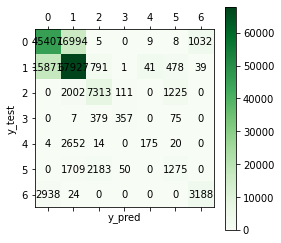

In [ ]:
y_pred = rede.predict(X_test_stand)

conf_matrix = confusion_matrix(y_pred, Y_test)
plt.matshow(conf_matrix, cmap=plt.cm.Greens)

for (m, n), value in np.ndenumerate(conf_matrix):
    plt.text(m, n, f"{value}", va="center", ha="center")
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.colorbar()
plt.plot()
plt.show()

In [ ]:
acuracia = accuracy_score(y_pred, Y_test)
fscore = f1_score(y_pred, Y_test, average='weighted')
precisao = precision_score(y_pred, Y_test, average='weighted')
revogacao = recall_score(y_pred, Y_test, average='weighted')

print("Acuracia {:.3f}".format(acuracia))
print("F1-Score: {:.3f}".format(fscore))
print("Precisão: {:.3f}".format(precisao))
print("Revocação: {:.3f}".format(revogacao))

Acuracia 0.721
Precisão: 0.742
Revocação: 0.721
F1-Score: 0.730


# 7 - Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 100 vezes

**7.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout <br>
7.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino**

In [ ]:
acuracia = []
fscore = []

for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)
    rede = MLPClassifier(hidden_layer_sizes=(10,),activation='relu',solver='adam',max_iter=300,verbose=False)
    rede.fit(X_train_stand,Y_train)
    acuracia.append(accuracy_score(y_pred, Y_test))
    fscore.append(f1_score(y_pred, Y_test, average='weighted'))  

In [ ]:
dp = np.std(fscore)
media = np.mean(fscore)
dp_a = np.std(acuracia)
media_a = np.mean(acuracia)

print("Desvio padrao Acuracia", dp_a, "\nMedia Acuracia", media_a,"\nDesvio padrao F-Scoce", dp, "\nMedia F-score", media)

Desvio padrao Acuracia 0.0011396505839028528 
Media Acuracia 0.3951031531118047 
Desvio padrao F-Scoce 0.0011319988748160715 
Media F-score 0.40465801966364034


# 8 - Repita por 100 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD

**8.1 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino**

 # 9 - Houve influência da escolha do otimizador no desempenho da rede?

**R: A responder...**

## Discussão

Nos passos anteriores, você avaliou o desempenho de uma única rede neural que contém os seguintes parâmetros: uma única camada oculta com 10 neurônios e função de ativação ReLU. O otimizador utilizado, quer seja SGD ou ADAM, trata-se do algoritmo para aproximar o gradiente do erro. Neste sentido, a escolha do otimizador é um hiperparâmetro, pois diz respeito a como a rede neural definida previamente atuará "em tempo de execução"  durante o processo de treinamento. Também são hiperparâmetros a quantidade de épocas, a taxa de aprendizado inicial, dentre outros.

Cabe alientar também que você efetuou o treinamento desta rede por 100 vezes e apresentou os resultados em termos de média +- desvio padrão. Lembre-se que em uma rede neural há a inicialização aleatória de pesos e, em consequência, o desempenho delas está sujeito à uma flutuação estocástica. A execução destas múltiplas vezes faz com que eliminemos algum viés introduzido por uma boa ou má "sorte" na escolha de pesos no caso de uma única execução.

Você também aprendeu uma estratégia para escalonar os atributos para uma melhor convergência da rede. Utilize-a em todos os treinamentos e testes propostos a seguir.

## Propondo Novas Arquiteturas

Variando  os parâmetros (uma ou duas camadas ocultas, com diferente números de neurônios em cada uma delas e a função de ativação) e o hiperparâmetros solver (Adam ou SGD) e o número de épocas (100,150 e 200), atenda ao que se pede:

1. Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha
2. Avalie cada uma das arquiteturas perante todos os hiperparâmetros apresentados por 100 vezes
3. Como resultado da avaliação, apresente:  
    3.1 Top-3 melhores redes no tocante à F-Score e Acurácia  
    3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn  

## Estimando o número de neurônios

Um dos problemas de pesquisa com redes neurais artificiais consiste na determinação do número de neurônios em sua arquitetura. Embora não seja possível definir a priori qual rede neural é adequada para um problema, pois isto só é possível mediante uma busca exaustiva, há regras na literatura que sugerem o número de neurônios escondidos, tal como a regra da Pirâmide Geométrica, dada a seguir:

$$N_h = \alpha \cdot \sqrt{N_i \cdot N_o},$$

em que $N_h$ é o número de neurônios ocultos (a serem distribuídos em uma ou duas camadas ocultas), $N_i$ é o número de neurônios na camada de entrada e $N_o$ é o número de neurônios na camada de saída. 

1. Consulte a documentação da classe MLPClassifier (disponível em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) e obtenha os valores de $N_i$ e $N_o$.
2. Teste os valores de $\alpha$ como sendo iguais a $0.5$, $2$ e $3$.
3. Proponha pelo menos 30 redes neurais segundo a regra da pirâmide geométrica e teste-as nos mesmos termos estabelecidos anterioremente  (solver, épocas, etc.)  
    3.1 Apresente as top-3 melhores redes no tocante à F-Score e Acurácia  

## Testando as Redes Neurais com Atributos Categóricos

1. Considere as 6 redes neurais obtidas nos dois top-3 anteriores (arquiteturas próprias e regra da pirâmide geométrica)
2. Com todos os atributos preditores da base de dados original, incluindo os categóricos, treine e teste estas mesmas redes por 100 repetições  
    2.1 Considere o melhor otimizador para cada uma delas  
    2.2 Faça uso de 200 épocas para treinamento  
    2.2 Apresente os resultados de acurácia e F-Score em termos da média +- dp para cada arquitetura
3. Apresente o gráfico boxplot para o F-Score das 6 arquiteturas perante as 100 repetições

## Considerações Parciais

1. É possível identificar uma rede com desempenho superior às demais?
2. Qual estratégia mostrou-se mais producente para a obtenção de boas arquiteturas (Estratégia Própria ou Pirâmide Geométrica)? Por quê?
3. Considerar os atributos categóricos trouxe melhorias? Justifique.
4. Um número maior de épocas trouxe melhorias?
5. Qual a maior dificuldade de resolução do problema proposto perante as RNAs?